# Custom datasets

How to get your own data in PyTorch...

In [22]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import requests
import zipfile
from pathlib import Path
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List

torch.__version__

'2.6.0'

## Device-agnostic code

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Sun Nov 16 13:06:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.95.05              Driver Version: 580.95.05      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   35C    P8              5W /   55W |      66MiB /   8188MiB |     36%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 1. Get data

Starting with a subset of `Food101` dataset.

In [4]:
data_path = Path("../data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"{image_path} directory does not exist, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

../data/pizza_steak_sushi directory exists


In [5]:
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    print("downloading pizza, steak, sushi data ...")
    url_to_dataset = "https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip"
    request = requests.get (url_to_dataset)
    f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("unzipping pizza, steak, sushi data ...")
    zip_ref.extractall(image_path)


downloading pizza, steak, sushi data ...
unzipping pizza, steak, sushi data ...


## Data preparation and exploration

In [6]:
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(image_path)

There are 2 directories and 0 images in '../data/pizza_steak_sushi'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in '../data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in '../data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in '../data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in '../data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in '../data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in '../data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in '../data/pizza_steak_sushi/test/steak'.


In [7]:
train_dir = image_path / "train"
test_dir = image_path / "test"

# Walk through training directory
walk_through_dir(train_dir)



There are 3 directories and 0 images in '../data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in '../data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in '../data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in '../data/pizza_steak_sushi/train/steak'.


## Visualizing an image

[PosixPath('../data/pizza_steak_sushi/train/sushi/1552504.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/1575445.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2574453.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/700405.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/307738.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/748830.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/765684.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2175561.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2021381.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/794647.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2004525.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/710379.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2267190.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2813454.jpg'), PosixPath('../data/pizza_steak_sushi/train/sushi/2641778.jpg'), PosixPath('../data/pizza_steak_sushi/train/su

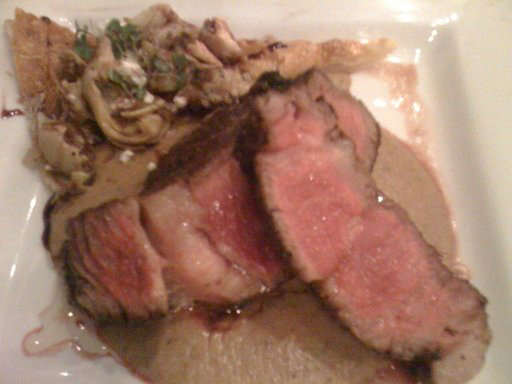

In [8]:
# random.seed(42)  # reproducibility

# 1. First getting all the images paths:
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)
print(len(image_path_list),"\n")

# 2. Pick a random image path:
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name:
image_class = random_image_path.parent.stem
print(random_image_path)
print(random_image_path.parent)
print(random_image_path.parent.stem, "\n")

# 4. Open image:
img = Image.open(random_image_path)

# 5. Print image metadata:
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

## Using `matplotlib` to show images

[[[185 172 155]
  [189 174 155]
  [191 174 154]
  ...
  [214 201 182]
  [213 200 181]
  [213 200 181]]

 [[187 174 157]
  [192 177 158]
  [194 177 157]
  ...
  [215 202 183]
  [214 201 182]
  [214 201 182]]

 [[190 177 160]
  [196 181 162]
  [199 182 162]
  ...
  [214 201 182]
  [213 200 181]
  [214 201 182]]

 ...

 [[178 158 149]
  [179 159 150]
  [179 159 152]
  ...
  [174 168 144]
  [173 167 143]
  [170 164 140]]

 [[178 158 149]
  [179 159 150]
  [181 161 154]
  ...
  [175 169 145]
  [173 167 143]
  [169 163 139]]

 [[175 155 146]
  [177 157 150]
  [179 159 152]
  ...
  [173 167 143]
  [170 164 140]
  [165 159 135]]]


(-0.5, 511.5, 383.5, -0.5)

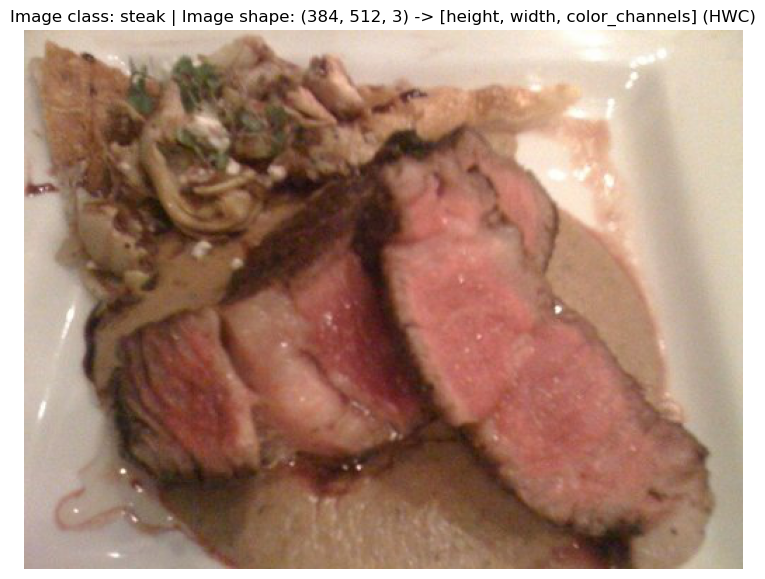

In [9]:
img_as_array = np.asarray(img)
print(img_as_array)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False)

## Transferring data to PyTorch data structure (tensor)

Turning data into a `torch.utils.data.Dataset` and subsequently a `torch.data.Dataloader`.
This makes the dataset to be compatible with our PyTorch model.

In [10]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),  # Resizing the image
    transforms.RandomHorizontalFlip(p=0.5),  # Flip the image randomly on the horizontal-data augmentation; artificially increasing diversity of the dataset.
    transforms.ToTensor()  # Turn the image to torch.Tensor
])

In [11]:
data_transform(img)

tensor([[[0.8510, 0.8667, 0.8784,  ..., 0.8235, 0.8078, 0.7843],
         [0.8588, 0.8745, 0.8941,  ..., 0.7686, 0.7961, 0.7922],
         [0.8706, 0.8824, 0.9020,  ..., 0.6588, 0.7725, 0.7961],
         ...,
         [0.6784, 0.6980, 0.7333,  ..., 0.7216, 0.7176, 0.7216],
         [0.6824, 0.7098, 0.7333,  ..., 0.7176, 0.7137, 0.7137],
         [0.6863, 0.7176, 0.7412,  ..., 0.7098, 0.7098, 0.7059]],

        [[0.8078, 0.8196, 0.8196,  ..., 0.7529, 0.7373, 0.7176],
         [0.8118, 0.8275, 0.8392,  ..., 0.6510, 0.7137, 0.7294],
         [0.8118, 0.8275, 0.8392,  ..., 0.5020, 0.6824, 0.7333],
         ...,
         [0.6471, 0.6588, 0.6863,  ..., 0.6510, 0.6431, 0.6392],
         [0.6510, 0.6706, 0.7020,  ..., 0.6471, 0.6392, 0.6353],
         [0.6588, 0.6784, 0.7059,  ..., 0.6392, 0.6353, 0.6314]],

        [[0.7176, 0.7098, 0.7059,  ..., 0.6627, 0.6588, 0.6314],
         [0.7255, 0.7412, 0.7412,  ..., 0.5490, 0.6275, 0.6471],
         [0.7333, 0.7373, 0.7412,  ..., 0.3569, 0.5843, 0.

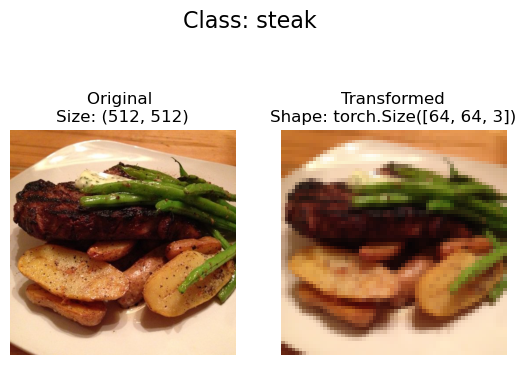

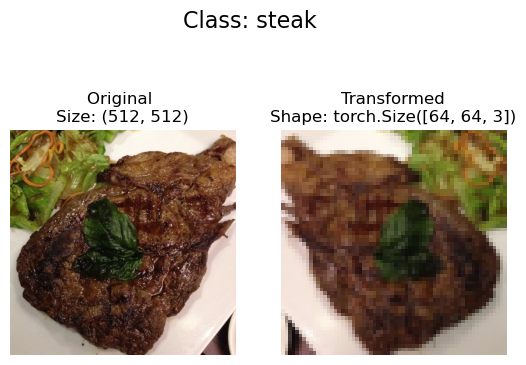

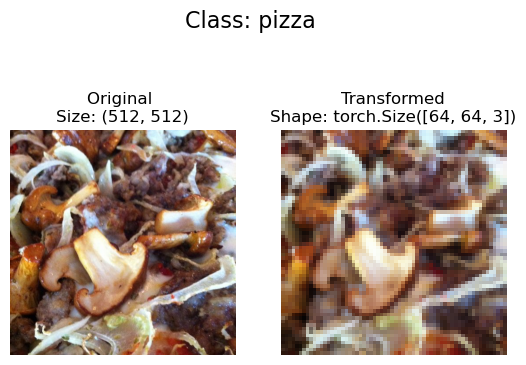

In [12]:
def plot_transformed_images(image_path, transform, n=3, seed=42):
    if seed:
        random.seed(seed)

    random_image_paths = random.sample(image_path, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path=image_path_list,
                        transform=data_transform,
                        seed=None)

## Loading image data using `ImageFolder`

In [13]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: ../data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: ../data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [14]:
train_data[0]

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [15]:
os.cpu_count()

20

## Turn dataset (loaded images) into `DataLoader`s

Data loaders help us to turn our dataset's into iterables and we can customise the bach_size, so the model can see baches of images at a time.

In [20]:
## Turn train and test datasets into DataLoader's
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                                   batch_size=BATCH_SIZE,
                                   num_workers=1,
                                   shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                                   batch_size=BATCH_SIZE,
                                   num_workers=1,
                                   shuffle=False)

print(train_dataloader, "\n", test_dataloader, "\n")
print(len(train_dataloader), len(test_dataloader))


225 75


## Loading image data with a custom `Dataset`

1. Want to be able to load images from file.
2. Want to be able to get class names from Dataset.
3. Want to be able to get classes as dictionary from the Dataset.

Pros:
* Can create a Dataset out of almost anything
* Not limited to PyTorch pre-built `Dataset` functions

Cons:
* Even though you could create `Dataset` out of almost naything, <u>it does not mean it will work</u>.
* Using a custom `Dataset` often results in us wrintine more code, which could be <u>prone to errors</u> or <u>preformance issues</u>.

In [23]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Creating a hellper function to get class names

In [36]:
# Setup path for target directory:
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: ../data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [27]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [39]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names could not be found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory} ... please check file structure.")

    # 3. Create a dictionary of index labels (computers prefer numbers rather than strings as labels)
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [40]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Create a custom `DataSet` to replicate `ImageFolder`